In [3]:
import tweepy
import requests 
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd 
import numpy as np 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

## read data from variance location 

In [4]:
df_arch=pd.read_csv('twitter-archive-enhanced.csv')



In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
file_name= url.split('/')[-1]
with open(file_name, 'wb') as file:
     file.write(response.content)

In [7]:
response

<Response [200]>

In [8]:
df_image=pd.read_csv('image-predictions.tsv', sep='\t')
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# gathering data from twiiter 

In [18]:
consumer_key = '**********************'
consumer_secret = '*********************'
access_token = '*****************************'
access_secret = '***************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

errors=[]
with open ('tweet_json.txt', 'w') as file:
    for tweet_id in df_arch['tweet_id']:
        try:
            status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
            json.dump(status._json, file)
            file.write('\n')
        except Exception as e:
            print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
            errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

Rate limit reached. Sleeping for: 332


Error on tweet id 759566828574212096;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 754011816964026368;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 680055455951884288;[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 444


In [10]:
df_list=[]
with open ('tweet_json.txt', 'r') as file:
    for line in file:
        tweet=json.loads(line)
        df_list.append(tweet)

df_api=pd.DataFrame(df_list)


## Assessing data

In [169]:
df_arch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [178]:
df_arch['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [41]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [42]:
df_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [43]:
df_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [44]:
#search more in columns  
df_arch.doggo.value_counts()
df_arch.floofer.value_counts()
df_arch.pupper.value_counts()
df_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [45]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   object 
 3   full_text                      2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   display_text_range             2331 non-null   object 
 6   entities                       2331 non-null   object 
 7   extended_entities              2059 non-null   object 
 8   source                         2331 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [46]:
df_arch.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [607]:
df_arch.tweet_id.isna().sum()

0

In [608]:
df_arch_clean.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [48]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [49]:
df_api.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 272
source                              0
in_reply_to_status_id            2254
in_reply_to_status_id_str        2254
in_reply_to_user_id              2254
in_reply_to_user_id_str          2254
in_reply_to_screen_name          2254
user                                0
geo                              2331
coordinates                      2331
place                            2330
contributors                     2331
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                134
possibly_sensitive_appealable     134
lang        

In [27]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2331 non-null   object 
 1   id                             2331 non-null   int64  
 2   id_str                         2331 non-null   object 
 3   full_text                      2331 non-null   object 
 4   truncated                      2331 non-null   bool   
 5   display_text_range             2331 non-null   object 
 6   entities                       2331 non-null   object 
 7   extended_entities              2059 non-null   object 
 8   source                         2331 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

In [30]:
df_arch[df_arch.name.str.islower()].name.value_counts()


a               55
the              8
an               7
very             5
one              4
just             4
quite            4
getting          2
mad              2
not              2
actually         2
all              1
infuriating      1
by               1
incredibly       1
officially       1
light            1
old              1
life             1
my               1
his              1
unacceptable     1
such             1
this             1
space            1
Name: name, dtype: int64

## Quality 
1. df_arch (name) have none instead of NaN and delet uniuque names .
2. df_arch (expanded_urls) has NaN values.
3. df_arch (source) Change provided URLs to the corresponding 4 categories.
4. df_arch ('doggo', 'floofer', 'pupper', 'puppo') have none instead of NaN.
5. df_arch (timestamp) is str instead of datetime.
6. df_arch (rating_denominator) has values less than 10 and values more than 10 for ratings.
7. df_api  (created_at) column is str instead of datetime.
8. df_arch (rating_numerator) make type float and extract int from str  .
9. df_image ('img_num') is not needed.

## tidiness 
1. df_api   Just 3 columns needed ( 'id',' retweet_count', 'favorite_count') .
2. df_image (the columns ('p1', 'p1_dog', 'p1_conf', '...etc')) should be just breed and confidence .
3. All datasets should be combined into 1 dataset only
    


# make copy for data



In [257]:
df_arch_clean = df_arch.copy()
df_image_clean = df_image.copy()
df_api_clean = df_api.copy()

In [258]:

df_arch[df_arch.name.str.islower()].name.value_counts()


a               55
the             8 
an              7 
very            5 
just            4 
quite           4 
one             4 
not             2 
actually        2 
mad             2 
getting         2 
this            1 
officially      1 
all             1 
my              1 
incredibly      1 
such            1 
life            1 
space           1 
light           1 
old             1 
unacceptable    1 
his             1 
by              1 
infuriating     1 
Name: name, dtype: int64

## Define
1:df_arch (name) have none instead of NaN and delet uniuque names


## code

In [259]:
df_arch_clean.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

## test

In [260]:
df_arch_clean['name'].value_counts()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
           ..
Ferg       1 
Georgie    1 
Hero       1 
Mabel      1 
Hector     1 
Name: name, Length: 931, dtype: int64

## Define
2:df_arch (expanded_urls) has NaN values

## code

In [261]:
df_arch_clean = df_arch_clean.loc[~df_arch_clean.expanded_urls.isnull()]

# test

In [262]:
df_arch_clean['expanded_urls'].isnull().sum()

df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        1502 non-null   object 
 13  doggo                       2297 

## Define
3:df_arch (source) Change provided URLs to the corresponding 4 categories

# code

In [263]:
source_list = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
              '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
              '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
              '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

new_source_list = ['Twitter for iPhone', 'Vine', 'Twitter Web Client', 'TweetDeck']
df_arch_clean['source'].replace(source_list, new_source_list, inplace=True)

# test

In [264]:
df_arch_clean['source'] .value_counts()



Twitter for iPhone    2163
Vine                  91  
Twitter Web Client    32  
TweetDeck             11  
Name: source, dtype: int64

## Define 
4:df_arch ('doggo', 'floofer', 'pupper', 'puppo') have none instead of NaN

# code

In [265]:
col_repl=['doggo','floofer','pupper','puppo']
df_arch_clean[col_repl]=df_arch_clean[col_repl].replace('None','')
df_arch_clean['dog_stage'] = df_arch_clean.doggo + df_arch_clean.floofer + df_arch_clean.pupper + df_arch_clean.puppo
f_arch_clean = df_arch_clean.drop(columns = col_repl, axis =1)
df_arch_clean['dog_stage']=df_arch_clean['dog_stage'].replace('',np.nan)

# test

In [266]:
df_arch_clean = df_arch_clean.drop(columns = col_repl, axis =1)
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2297 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2297 non-null   object 
 4   source                      2297 non-null   object 
 5   text                        2297 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2297 non-null   int64  
 11  rating_denominator          2297 non-null   int64  
 12  name                        1502 non-null   object 
 13  dog_stage                   374 n

## Define
5:df_arch (timestamp) is str instead of datetime

# code

In [267]:
df_arch_clean.timestamp=pd.to_datetime(df_arch_clean.timestamp)

# test

In [268]:
df_arch_clean.timestamp.dtype

datetime64[ns, UTC]

## Define
6:df_arch (rating_denominator) has values less than 10 and values more than 10 for ratings 

# code

In [269]:
for n in df_arch_clean.rating_denominator:
    if n == 10:
        df_arch_clean.rating_denominator=n            

In [270]:

df_arch_clean.rating_denominator.value_counts()

10    2297
Name: rating_denominator, dtype: int64

# test

In [271]:
df_arch_clean.rating_denominator.value_counts()

10    2297
Name: rating_denominator, dtype: int64

## Define
7:df_api  (created_at) column is str instead of datetime


# code

In [272]:
df_api_clean.created_at=pd.to_datetime(df_api_clean.created_at)

# test

In [273]:
df_api_clean.created_at.dtype

datetime64[ns, UTC]

## Define
8:df_arch (rating_numerator) make type float and extract int from str 


# code

In [274]:
df_arch_clean['rating_numerator'] = df_arch_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')



# test

In [275]:
df_arch_clean.rating_numerator.value_counts()


12.00      547
11.00      455
10.00      455
13.00      339
9.00       156
8.00       102
7.00       53 
14.00      50 
5.00       34 
6.00       32 
3.00       19 
4.00       16 
2.00       9  
1.00       6  
9.75       2  
0.00       2  
165.00     1  
420.00     1  
99.00      1  
84.00      1  
60.00      1  
88.00      1  
80.00      1  
1776.00    1  
13.50      1  
11.27      1  
15.00      1  
144.00     1  
121.00     1  
11.26      1  
50.00      1  
204.00     1  
45.00      1  
24.00      1  
44.00      1  
143.00     1  
Name: rating_numerator, dtype: int64




## Define
9:df_image ( img_num) is not needed


# code

In [276]:
df_image_clean.drop(columns='img_num', axis=1 ,inplace=True)

# test

In [277]:
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

## Define

1:df_image (the columns (p1, p1_dog, p1_conf, ...etc)) should be just breed and confidence


# code

In [278]:
# Create breed and confidence columns with highest confidence predictions and drop other columns
breed = []
confidence = []
# iterating over df_pred row by row and taking the highest confident prediction other wise np.nan
for index, row in df_image_clean.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
df_image_clean['breed'] = breed
df_image_clean['confidence'] = confidence

# test

In [279]:
df_image_clean.head(2)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826


## Define 

2:Just 3 columns needed id, retweet_count, favorite_count


# code

In [280]:
df_image_clean = df_image_clean[['tweet_id', 'jpg_url', 'breed', 'confidence']]

df_image_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


In [281]:
cola=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_arch_clean[cola].notnull().sum()

retweeted_status_id           180
retweeted_status_user_id      180
retweeted_status_timestamp    180
dtype: int64

In [282]:
df_arch_clean = df_arch_clean.loc[~df_arch_clean.retweeted_status_id.notnull()]

In [283]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2117 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2117 non-null   datetime64[ns, UTC]
 4   source                      2117 non-null   object             
 5   text                        2117 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2117 non-null   float64         

In [284]:
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
df_arch_clean.drop(columns = cols, axis=1, inplace=True)
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   int64              
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   text                2117 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2117 non-null   float64            
 6   rating_denominator  2117 non-null   int64              
 7   name                1391 non-null   object             
 8   dog_stage           338 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(5)
memory usage: 165.4+ KB


In [285]:
df_api_clean.rename(columns={'id':'tweet_id'},inplace=True)


In [286]:
# Just 3 columns needed tweet_id, retweet_count, favorite_count
df_api_clean = df_api_clean[['tweet_id', 'retweet_count', 'favorite_count']]


# test

In [287]:
df_arch_clean.isnull().sum()

tweet_id              0   
timestamp             0   
source                0   
text                  0   
expanded_urls         0   
rating_numerator      0   
rating_denominator    0   
name                  726 
dog_stage             1779
dtype: int64

## Define
3:All datasets should be combined into 1 dataset only

# code

In [288]:
t_arch_master= pd.merge(df_arch_clean, df_image_clean, on = "tweet_id", how = "left")

In [289]:
t_arch_master = pd.merge(t_arch_master, df_api_clean, on = "tweet_id", how = "left")

# test

In [290]:
t_arch_master.isnull().sum()

tweet_id              0   
timestamp             0   
source                0   
text                  0   
expanded_urls         0   
rating_numerator      0   
rating_denominator    0   
name                  726 
dog_stage             1779
jpg_url               123 
breed                 640 
confidence            640 
retweet_count         7   
favorite_count        7   
dtype: int64

In [291]:
t_arch_master.to_csv('twitter_archive_master.csv',index=False)

In [292]:
df_master =pd.read_csv('twitter_archive_master.csv')
#and checking the file with .info after reading it:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2117 non-null   int64  
 1   timestamp           2117 non-null   object 
 2   source              2117 non-null   object 
 3   text                2117 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2117 non-null   float64
 6   rating_denominator  2117 non-null   int64  
 7   name                1391 non-null   object 
 8   dog_stage           338 non-null    object 
 9   jpg_url             1994 non-null   object 
 10  breed               1477 non-null   object 
 11  confidence          1477 non-null   float64
 12  retweet_count       2110 non-null   float64
 13  favorite_count      2110 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 231.7+ KB


In [293]:
df_master.timestamp=pd.to_datetime(df_master.timestamp)
df_master.timestamp.dtype

datetime64[ns, UTC]

In [294]:
df_master.tweet_id=df_master.tweet_id.astype(str)


In [295]:
df_master.tweet_id.dtype

dtype('O')

## Visualizing

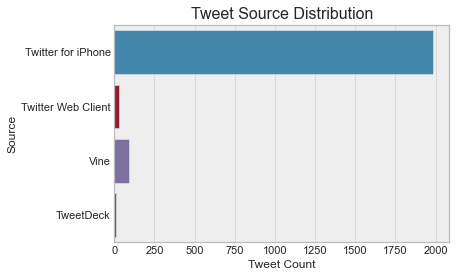

In [310]:
#visuale sourse for tweets 
plt.style.use('bmh')
sns.countplot(data = df_master, y = 'source')
plt.title('Tweet Source Distribution', fontsize=16)
plt.xlabel('Tweet Count', fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.savefig('tweet-source.png');


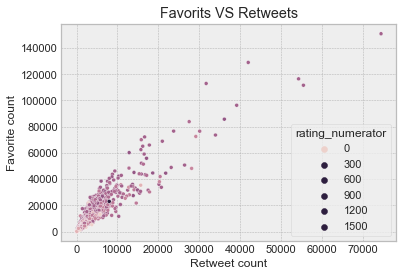

In [311]:
# visuale favorite with best retweet
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=df_master,
                     hue='rating_numerator', hue_norm=(5, 20), s=15) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

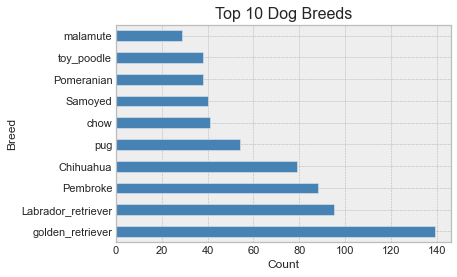

In [312]:
# visuale top 10 dog breed 
top_breeds = df_master.breed.value_counts()[0:10].sort_values(axis=0, ascending=False)
top_breeds.plot(kind = 'barh', color=['steelblue'])
plt.title('Top 10 Dog Breeds', size=16)
plt.xlabel('Count', size=12)
plt.ylabel('Breed', size=12)
plt.savefig('top-breeds.png');

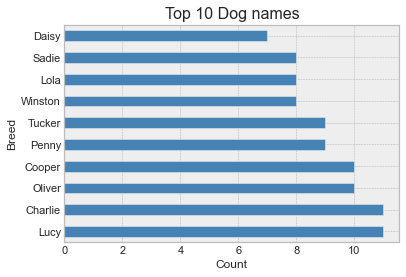

In [313]:
# visuale top doog names 
top_doog_name = df_master.name.value_counts()[0:10].sort_values(axis=0, ascending=False)
top_doog_name.plot(kind = 'barh', color=['steelblue'])
plt.title('Top 10 Dog names', size=16)
plt.xlabel('Count', size=12)
plt.ylabel('Breed', size=12)
plt.savefig('top-breeds.png');

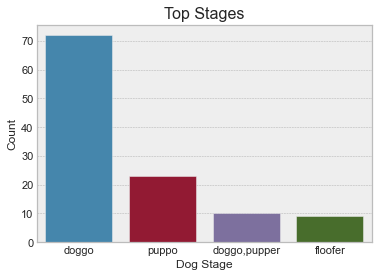

In [314]:
# visuale top  dog stage
sorted_stage = df_master['dog_stage'].value_counts()[1:6].index
sns.countplot(data = df_master, x = 'dog_stage', order = sorted_stage, orient = 'h')
plt.xlabel('Dog Stage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top Stages',fontsize=16);


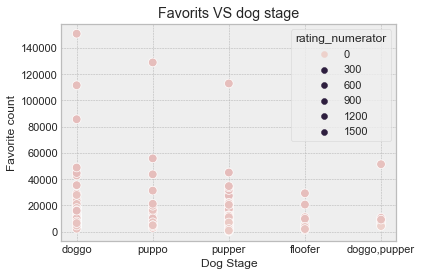

In [315]:
#visuale favorit for dog stage
dog_fav = sns.scatterplot(x='dog_stage', y='favorite_count', data=df_master,
                     hue='rating_numerator', hue_norm=(5, 100), s=75) 
dog_fav.set(xlabel='Dog Stage', ylabel='Favorite count', title='Favorits VS dog stage')
plt.show()

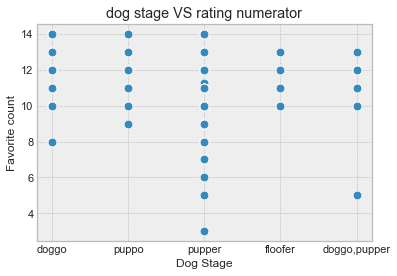

In [316]:
#visuale rating for dog stage
dog_rating = sns.scatterplot(x='dog_stage', y='rating_numerator', data=df_master,
                      hue_norm=(5, 100), s=75) 
dog_rating.set(xlabel='Dog Stage', ylabel='Favorite count', title='dog stage VS rating numerator')
plt.show()